# Gene expression

**Import**

In [3]:
# from second tutorial notebook (Part02)
import scanpy as sc
import pandas as pd
import scvelo as scv
import numpy as np
import seaborn as sns
from matplotlib.pyplot import rc_context
import matplotlib.pyplot as plt
import sklearn
import ipywidgets as widgets

# others
import re
import os

# first tutorial
import diffxpy.api as dxpy
import plotly.express as px

In [4]:
adata_input = '/home/astridkd/testis_singlecell/Workspaces/adahl/birc-project-akd/results/cluster_results/BON/cluster_adata.h5ad'

In [5]:
adata = sc.read(adata_input)

In [ ]:
#read lncRNA file 

In [ ]:
#bar chart of nuclei/cell type

In [6]:
adata

AnnData object with n_obs × n_vars = 5043 × 25535
    obs: 'DATASET', 'batch', 'total_counts', 'n_genes_by_counts', 'percent_mito', 'prop_unspl', 'prop_spl', 'perc_MALAT1', 'n_genes', 'doublet_scores', 'predicted_doublets', 'SpermatogoniaA_score', 'SpermatogoniaB_score', 'SpermatocytesI_score', 'SpermatocytesII_score', 'Round.Spt_score', 'Elong.Spt_score', 'Sertoli_score', 'Macroph_score', 'Leydig_score', 'Endothelial_score', 'Undif. SG_score', 'Dif. SG_score', 'Lept. SC_score', 'Zyg. SC_score', 'Pach.Dipl. SC_score', 'Early round SD_score', 'Late round SD_score', 'Elong SD_score', 'SC_score', 'SC.I_score', 'SC.II_score', 'leiden_R.3', 'leiden_R.2', 'leiden_R.1', 'spermatogenesis_types'
    var: 'gene_ids', 'feature_types', 'chromosome', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'DATASET_colors', 'DE_leiden', 'DE_leiden_celltype', 'hvg', 'leiden', 'leiden_R.1_colors', 'leiden_R.2_colors', 'leiden_R.3_colors', 'neighbors', 'pca', 'spermatogenesis_

In [ ]:
del(adata

In [7]:
adata.obs['spermatogenesis_types']

SN219_AAACCTGAGAAAGTGG      SpermatocytesI
SN219_AAACCTGAGACCTTTG      SpermatocytesI
SN219_AAACCTGAGGCGCTCT      SpermatogoniaB
SN219_AAACCTGAGTCGCCGT      SpermatogoniaA
SN219_AAACCTGCAGATTGCT             Sertoli
                                ...       
SN224_TTTGTCAAGGGATCTG      SpermatogoniaA
SN224_TTTGTCAAGTGAACGC     SpermatocitesII
SN224_TTTGTCACAGTAGAGC    Elong_Spermatids
SN224_TTTGTCACATCCTTGC      SpermatocytesI
SN224_TTTGTCATCCGCAGTG      SpermatogoniaA
Name: spermatogenesis_types, Length: 7407, dtype: category
Categories (8, object): ['-', 'Elong_Spermatids', 'Round_Spermatids', 'Sertoli', 'SpermatocitesII', 'SpermatocytesI', 'SpermatogoniaA', 'SpermatogoniaB']

In [8]:
# vector for genes with -IT in names, True/False
intronic = ['-IT' in i for i in adata.var_names] 

In [9]:
intr_genes = adata[:,intronic].var_names

In [10]:
intr_genes # in chromosomal order

Index(['ERI3-IT1', 'AGBL4-IT1', 'NEGR1-IT1', 'WARS2-IT1', 'ITPKB-IT1',
       'TGFA-IT1', 'ANKRD44-IT1', 'VWC2L-IT1', 'MAGI1-IT1', 'SLIT2-IT1',
       'ARHGAP26-IT1', 'PPP2R2B-IT1', 'KCNQ5-IT1', 'RPS6KA2-IT1', 'RNF216-IT1',
       'SND1-IT1', 'BIN3-IT1', 'NRG1-IT1', 'ARHGAP22-IT1', 'CACNA1C-IT3',
       'SMIM2-IT1', 'FGF14-IT1', 'NALF1-IT1', 'GABPB1-IT1', 'ANP32A-IT1',
       'DIP2A-IT1'],
      dtype='object')

Intronic transcripts

In [11]:
len(intr_genes)

26

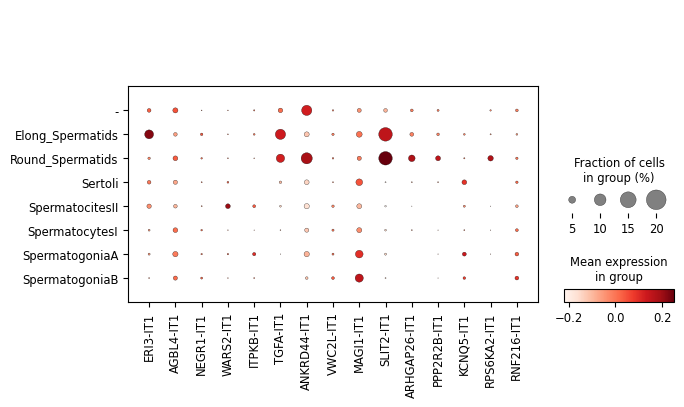

In [12]:
sc.pl.dotplot(adata, intr_genes[:15], groupby='spermatogenesis_types')

In [13]:
# LINC genes, True/False vector
LINC = ['LINC' in i for i in adata.var_names] 

1403 LINC genes in total are expressed. 3 LINC in top 10 most differently expressed genes in round spermatids.

In [14]:
LINC_genes = adata[:,LINC].var_names

In [15]:
adata[:,LINC]

View of AnnData object with n_obs × n_vars = 7407 × 1403
    obs: 'DATASET', 'batch', 'total_counts', 'n_genes_by_counts', 'percent_mito', 'prop_unspl', 'prop_spl', 'perc_MALAT1', 'n_genes', 'doublet_scores', 'predicted_doublets', 'SpermatogoniaA_score', 'SpermatogoniaB_score', 'SpermatocytesI_score', 'SpermatocytesII_score', 'Round.Spt_score', 'Elong.Spt_score', 'Sertoli_score', 'Macroph_score', 'Leydig_score', 'Endothelial_score', 'leiden_R.3', 'leiden_R.2', 'leiden_R.1', 'spermatogenesis_types', 'spermatogenesis_types2'
    var: 'gene_ids', 'feature_types', 'chromosome', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'DATASET_colors', 'DE_leiden', 'hvg', 'leiden', 'leiden_R.1_colors', 'leiden_R.2_colors', 'leiden_R.3_colors', 'log1p', 'neighbors', 'pca', 'scaled_DE_leiden', 'spermatogenesis_types2_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'norm_sct', 'raw_counts', 'spliced', 'umi_corr', 'unspliced'
    obsp: 'connectiv

In [13]:
LINC_genes

Index(['LINC01409', 'LINC00115', 'LINC01128', 'LINC01786', 'LINC01134',
       'LINC01346', 'LINC01345', 'LINC02780', 'LINC01777', 'LINC02781',
       ...
       'LINC01284', 'LINC01278', 'LINC00630', 'LINC01285', 'LINC00629',
       'LINC00632', 'LINC00893', 'LINC00850', 'LINC00894', 'LINC00278'],
      dtype='object', length=1403)

In [14]:
genes_to_plot = LINC_genes[:5]

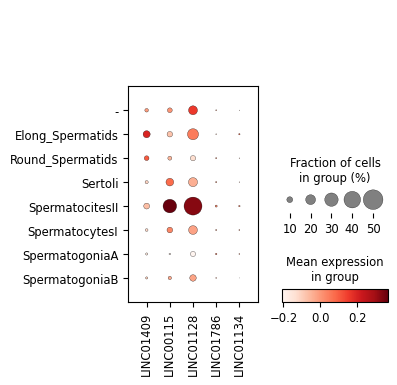

In [15]:
sc.pl.dotplot(adata, genes_to_plot, groupby='spermatogenesis_types')

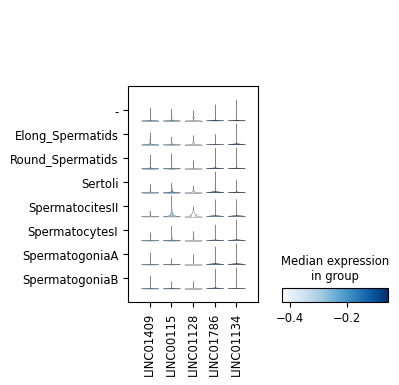

In [16]:
sc.pl.stacked_violin(adata, genes_to_plot, groupby='spermatogenesis_types', rotation=10);

In [17]:
#ax = sc.pl.stacked_violin(adata, groupby='spermatogenesis_types', swap_axes=False, dendrogram=True)


TypeError: stacked_violin() missing 1 required positional argument: 'var_names'

In [ ]:
#sc.pl.violin(adata, [], groupby='spermatogenesis_types');

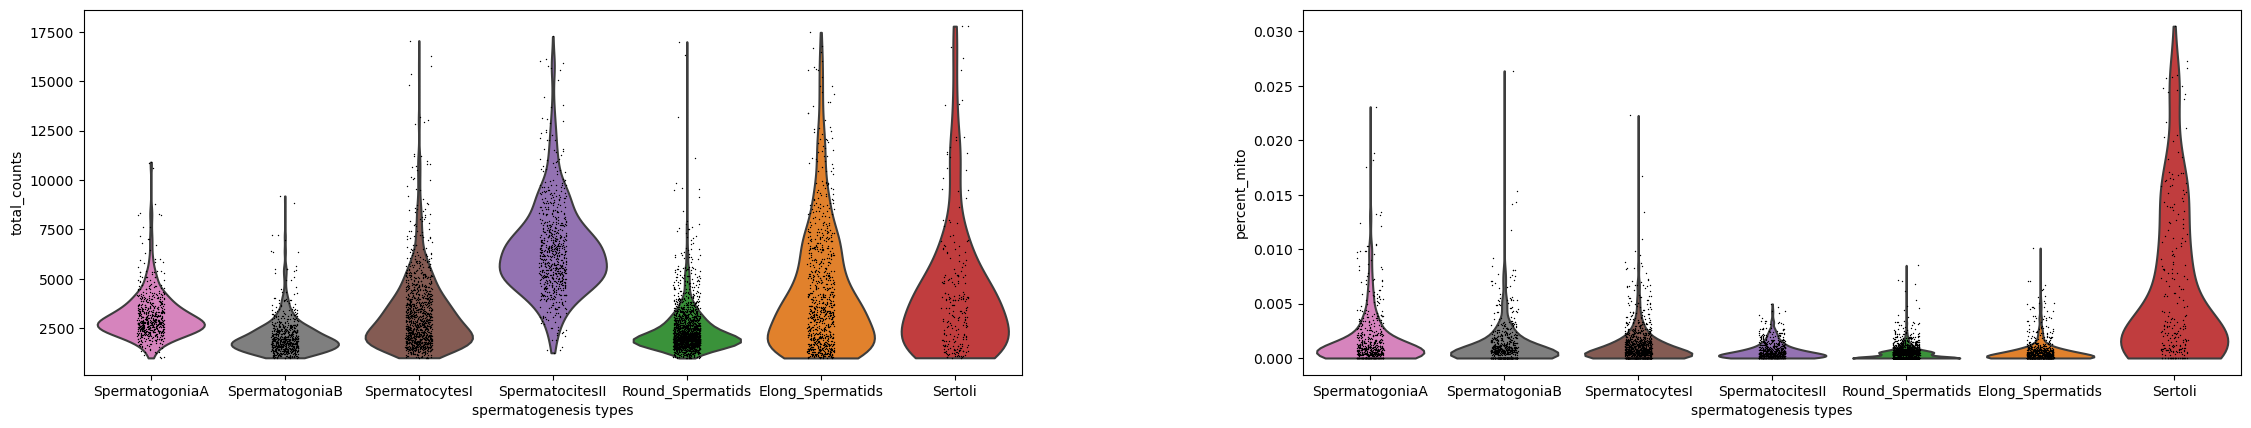

In [18]:
with rc_context({'figure.figsize': (10, 5)}):
    sc.pl.violin(adata, ['total_counts', 'percent_mito'], groupby='spermatogenesis_types', order=['SpermatogoniaA','SpermatogoniaB','SpermatocytesI','SpermatocitesII','Round_Spermatids','Elong_Spermatids','Sertoli'])

In [19]:
pd.DataFrame(adata.uns['DE_leiden']['names']).head() # top 5 ranked genes for each cluster

,0,1,2,3,4,5,6,7,8,9
0,LOC440896,LOC105372004,LINC00917,FAM229A,amplicon-chrX-GAGE10/1/2A/13/12B/12C/12D/12E/1...,MALAT1,ANKRD20A1,amplicon-chrX-GAGE10/1/2A/13/12B/12C/12D/12E/1...,ZCWPW1,ZBTB20
1,SPAG16,LRRIQ1,LOC440896,TNP1,RPS2,LINC01794,C1QTNF3,HMGB1,MIR4713HG,COL1A2
2,TEX51,CCDC146,EML2-AS1,C20orf144,LOC100507336,ANKRD7,FAM153A,amplicon-chrX-PAGE2/2B/5,SMC1B,ERBB4
3,GOLGA6L2,TTC29,LRMDA,PRM1,SMC1B,LOC105373554,ANKRD62,PARD3,RAD51AP2,CARMIL1
4,AFG1L,SPINK2,CCSER1,PRM2,LINC02645,PHF7,ANKRD36C,NRG3,AUTS2,MIR202HG


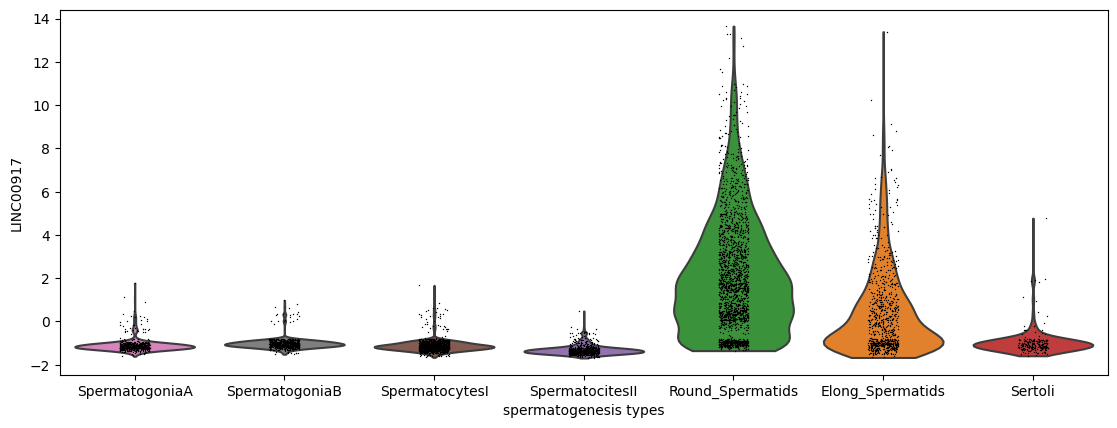

In [20]:
# If you want to compare a certain gene across groups
# no. 1 in  round spermatids
with rc_context({'figure.figsize': (11, 5)}):
    sc.pl.violin(adata, ['LINC00917'], groupby='spermatogenesis_types', order=['SpermatogoniaA','SpermatogoniaB','SpermatocytesI','SpermatocitesII','Round_Spermatids','Elong_Spermatids','Sertoli'])

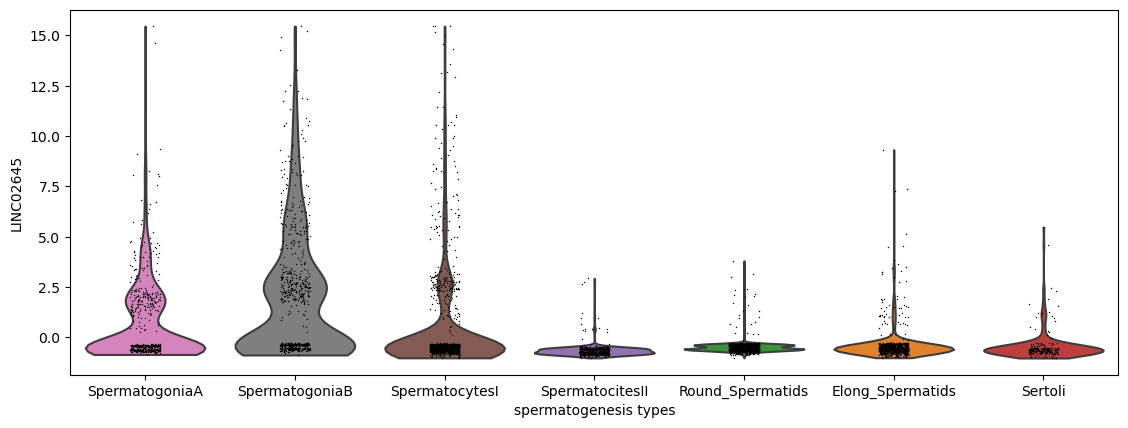

In [21]:
# no. 5 in spermatogonia B
with rc_context({'figure.figsize': (11, 5)}):
    sc.pl.violin(adata, ['LINC02645'], groupby='spermatogenesis_types', order=['SpermatogoniaA','SpermatogoniaB','SpermatocytesI','SpermatocitesII','Round_Spermatids','Elong_Spermatids','Sertoli'])

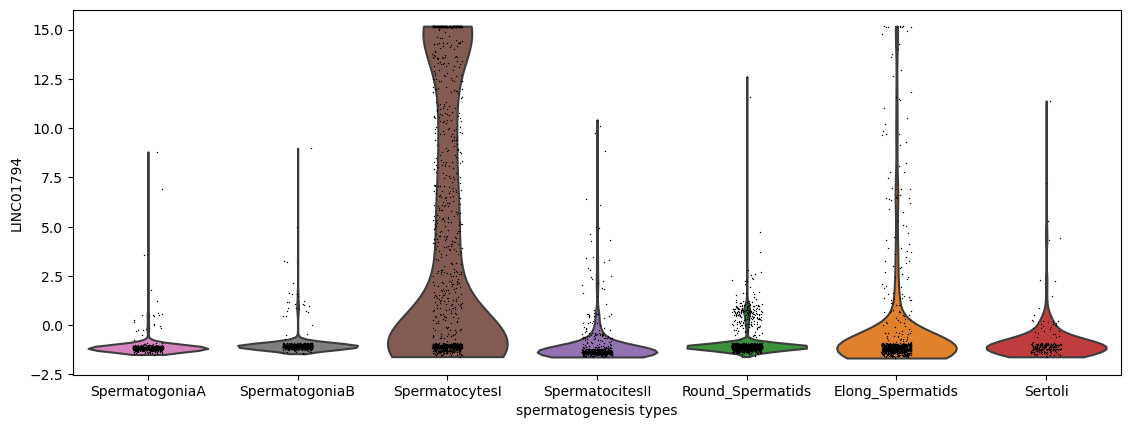

In [30]:
# no. 2 in spermatocytes I
with rc_context({'figure.figsize': (11, 5)}):
    sc.pl.violin(adata, ['LINC01794'], groupby='spermatogenesis_types', order=['SpermatogoniaA','SpermatogoniaB','SpermatocytesI','SpermatocitesII','Round_Spermatids','Elong_Spermatids','Sertoli'])

In [23]:
adata.uns['DE_leiden'] # from highest to lowest score

{'logfoldchanges': array([(nan, nan, nan, nan, nan, nan, nan, nan, nan, nan),
        (nan, nan, nan, nan, nan, nan, nan, nan, nan, nan),
        (nan, nan, nan, nan, nan, nan, nan, nan, nan, nan), ...,
        (nan, nan, nan, nan, nan, nan, nan, nan, nan, nan),
        (nan, nan, nan, nan, nan, nan, nan, nan, nan, nan),
        (nan, nan, nan, nan, nan, nan, nan, nan, nan, nan)],
       dtype=[('0', '<f4'), ('1', '<f4'), ('2', '<f4'), ('3', '<f4'), ('4', '<f4'), ('5', '<f4'), ('6', '<f4'), ('7', '<f4'), ('8', '<f4'), ('9', '<f4')]),
 'names': array([('LOC440896', 'LOC105372004', 'LINC00917', 'FAM229A', 'amplicon-chrX-GAGE10/1/2A/13/12B/12C/12D/12E/12F/12G/12H/12J', 'MALAT1', 'ANKRD20A1', 'amplicon-chrX-GAGE10/1/2A/13/12B/12C/12D/12E/12F/12G/12H/12J', 'ZCWPW1', 'ZBTB20'),
        ('SPAG16', 'LRRIQ1', 'LOC440896', 'TNP1', 'RPS2', 'LINC01794', 'C1QTNF3', 'HMGB1', 'MIR4713HG', 'COL1A2'),
        ('TEX51', 'CCDC146', 'EML2-AS1', 'C20orf144', 'LOC100507336', 'ANKRD7', 'FAM153A', 'amplicon-c

In [24]:
adata.uns['DE_leiden']['names'][0] # no. 1 for all 7 clusters 

('LOC440896', 'LOC105372004', 'LINC00917', 'FAM229A', 'amplicon-chrX-GAGE10/1/2A/13/12B/12C/12D/12E/12F/12G/12H/12J', 'MALAT1', 'ANKRD20A1', 'amplicon-chrX-GAGE10/1/2A/13/12B/12C/12D/12E/12F/12G/12H/12J', 'ZCWPW1', 'ZBTB20')

In [25]:
top15_LINC = []
for i in range(15):
    for gene in adata.uns['DE_leiden']['names'][i]:
        if 'LINC' in gene:
            top15_LINC.append(gene)

top15_LINC

['LINC00917', 'LINC01794', 'LINC02645', 'LINC01000', 'LINC01492', 'LINC01507']

In [ ]:
top15_LINC = []
for i in range(15):
    for gene in adata.uns['DE_leiden']['names'][i]:
        if gene in list:
            top15_LINC.append(gene)

top15_LINC

In [26]:
adata

AnnData object with n_obs × n_vars = 7407 × 25509
    obs: 'DATASET', 'batch', 'total_counts', 'n_genes_by_counts', 'percent_mito', 'prop_unspl', 'prop_spl', 'perc_MALAT1', 'n_genes', 'doublet_scores', 'predicted_doublets', 'SpermatogoniaA_score', 'SpermatogoniaB_score', 'SpermatocytesI_score', 'SpermatocytesII_score', 'Round.Spt_score', 'Elong.Spt_score', 'Sertoli_score', 'Macroph_score', 'Leydig_score', 'Endothelial_score', 'leiden_R.3', 'leiden_R.2', 'leiden_R.1', 'spermatogenesis_types', 'spermatogenesis_types2'
    var: 'gene_ids', 'feature_types', 'chromosome', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'DATASET_colors', 'DE_leiden', 'hvg', 'leiden', 'leiden_R.1_colors', 'leiden_R.2_colors', 'leiden_R.3_colors', 'log1p', 'neighbors', 'pca', 'scaled_DE_leiden', 'spermatogenesis_types2_colors', 'spermatogenesis_types_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'norm_sct', 'raw_counts', 'spliced', 'umi_corr', 'unspli

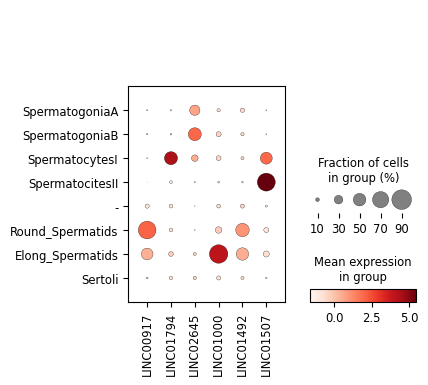

In [35]:
sc.pl.dotplot(adata, top15_LINC, groupby='spermatogenesis_types', categories_order=['Undif. SG','Dif. SG','SC.I','SC.II','Early round SD','Late round SD','Elong. SD','Sertoli'])

In [59]:

new_names = {
    '0':'Round_Spermatids',
    '1':'-',
    '2':'Round_Spermatids',
    '3':'Elong_Spermatids',
    '4':'SpermatogoniaB',
    '5':'SpermatocytesI',
    '6':'SpermatocitesII',
    '7':'SpermatogoniaA',
    '8':'SpermatocytesI',
    '9':'Sertoli'
}


In [20]:
adata

AnnData object with n_obs × n_vars = 7407 × 25509
    obs: 'DATASET', 'batch', 'total_counts', 'n_genes_by_counts', 'percent_mito', 'prop_unspl', 'prop_spl', 'perc_MALAT1', 'n_genes', 'doublet_scores', 'predicted_doublets', 'SpermatogoniaA_score', 'SpermatogoniaB_score', 'SpermatocytesI_score', 'SpermatocytesII_score', 'Round.Spt_score', 'Elong.Spt_score', 'Sertoli_score', 'Macroph_score', 'Leydig_score', 'Endothelial_score', 'leiden_R.3', 'leiden_R.2', 'leiden_R.1', 'spermatogenesis_types', 'spermatogenesis_types2'
    var: 'gene_ids', 'feature_types', 'chromosome', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'DATASET_colors', 'DE_leiden', 'hvg', 'leiden', 'leiden_R.1_colors', 'leiden_R.2_colors', 'leiden_R.3_colors', 'log1p', 'neighbors', 'pca', 'scaled_DE_leiden', 'spermatogenesis_types2_colors', 'spermatogenesis_types_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'norm_sct', 'raw_counts', 'spliced', 'umi_corr', 'unspli

In [21]:
adata.varm['PCs']

array([[-0.00788773,  0.00585284,  0.00700681, ...,  0.00307294,
         0.00952822,  0.00118785],
       [ 0.00657631,  0.00271585,  0.01294122, ...,  0.00160555,
         0.0030654 ,  0.0022331 ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.00490915,  0.0127488 , -0.00271461, ..., -0.00530995,
         0.00780153, -0.00504433],
       [-0.02171968,  0.06190937, -0.01079962, ..., -0.02153959,
         0.00218953,  0.0089512 ]])

In [22]:
adata.uns['pca']

{'params': {'use_highly_variable': True, 'zero_center': True},
 'variance': array([257.3791471 , 139.7424514 ,  96.57718822,  75.97439434,
         50.4448972 ,  45.21416121,  35.82794981,  32.23291902,
         29.47625021,  23.18407148,  19.40101489,  18.69477703,
         15.65486393,  14.36910773,  12.75617574,  11.70465629,
         11.53201198,  10.62706719,   9.86689815,   9.47494573,
          9.23170763,   9.0395166 ,   8.37854787,   8.11138072,
          7.80767027,   7.62579443,   7.44207136,   7.15213158,
          7.10453302,   6.99317371,   6.74289794,   6.6540222 ,
          6.54668644,   6.35180742,   6.25545894,   6.19835047,
          6.10145341,   6.0673934 ,   6.04008768,   5.98456541,
          5.93940637,   5.92631675,   5.84681988,   5.82716875,
          5.81637105,   5.8012908 ,   5.78144627,   5.76226409,
          5.75110087,   5.74944765]),
 'variance_ratio': array([0.0172175 , 0.00934814, 0.00646058, 0.00508234, 0.00337454,
        0.00302462, 0.00239673, 0

PC1(1,72 % variance explained), PC2(0,93 % variance explained)

In [ ]:
sc.tl.dendrogram

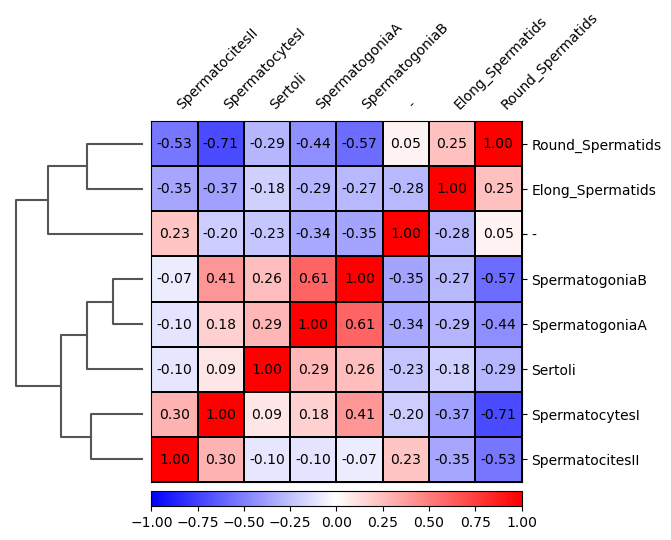

In [62]:
sc.pl.correlation_matrix(adata,'spermatogenesis_types', show_correlation_numbers=True)